# Support Vector Machines

## Xuan Pham

In [2]:
#load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
%matplotlib inline 
import sys

#basic methods from scikit learn package
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
print("The Python version is %s.%s.%s" % sys.version_info[:3])

The Python version is 3.7.6


In [4]:
%pwd

'C:\\Users\\Xuan Pham\\Dropbox\\Summer_2020\\BIA6303\\Module3\\code'

In [5]:
cd C:\\Users\\Xuan Pham\\Dropbox\\Summer_2020\\BIA6303\\Module3\\data

C:\Users\Xuan Pham\Dropbox\Summer_2020\BIA6303\Module3\data


In [6]:
#import data
df = pd.read_csv("Churn_Calls.csv", sep=",")
df.shape

(5000, 20)

In [7]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no


Our target variable is churn (last column). 

In [8]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [9]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Moving the churn column to the front. 

In [10]:
# designate target variable name
targetName = 'churn'
#print(targetName)
targetSeries = df[targetName] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(5)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


## Some Exploratory Data Analysis & Data Preprocessing

churn
no     4293
yes     707
Name: churn, dtype: int64


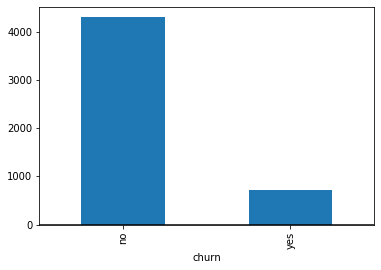

In [11]:
#Basic bar chart since the target is binominal
groupby = df.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

14% of the customers churned. If we are going to use a machine learning model, it needs to have better predictive performance than 86%.

We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables. 

In [12]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

# perform data transformation. Creates dummy variables for categorical variables. 
# very similar to the dummies() function in the dummy package in R
# I did not write this code chunk but cannot find the source to give proper credit to its creator. 
#If you do find the source, please let me know.
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [13]:
df.shape

(5000, 74)

In [14]:
df.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

## Train/Test or the Holdout Method

I am using a 60/40 split (60% trainining set and 40% test set). The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". 

In [15]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.40, random_state=0)

In [16]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(2000, 73)
(3000, 73)
(2000,)
(3000,)


One great option in this method is class_weight, which you can set to make the "weight of each observation inversely proportional to the class frequencies of the data"
(scikit-learn.org, https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#Build
clf_linearSVC = make_pipeline(StandardScaler(), SVC(kernel='linear', class_weight='balanced'))
print(clf_linearSVC)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [18]:
#Train
clf_linearSVC.fit(features_train, target_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [19]:
#Validate
target_predicted = clf_linearSVC.predict(features_test)
print(classification_report(target_test, target_predicted,target_names=['No','Yes'])) #no=0; yes=1
print(confusion_matrix(target_test, target_predicted))
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(target_test, target_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

print("Accuracy Score", accuracy_score(target_test, target_predicted))

              precision    recall  f1-score   support

          No       0.96      0.76      0.85      1708
         Yes       0.36      0.80      0.50       292

    accuracy                           0.76      2000
   macro avg       0.66      0.78      0.67      2000
weighted avg       0.87      0.76      0.80      2000

[[1296  412]
 [  59  233]]
True Negatives:  1296
False Positives:  412
False Negatives:  59
True Positives:  233
Accuracy Score 0.7645


The overall accuracy rate is 76.45%, which is slightly below the benchmark of 86%. However, the classifier predicted 80% of the churned customers (recall) and was 36% accurate with its positive predictions (precision).

Let's do cross validation to see if there's any improvement in accuracy score.

In [20]:
#verify with 10-fold cross validation
#this will take a long time to run! 
#scores = cross_val_score(clf_linearSVC, features_train, target_train, cv=10)
#print("Cross Validation Score for each K",scores)
#scores.mean()   

There is another function called LinearSVC that also builds a linear SVC model but allows for additional tuning. You can check it out here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

## Tuning the C parameter (soft margin)

Next, let's see if we can tune the C parameter to allow for a soft margin.

In [21]:
import time
start = time.time()
param_grid={"C": [.01,0.2]} #trying out two different C values.
clf_linearSVC = SVC(kernel='linear', class_weight='balanced')
grid_svm = GridSearchCV(clf_linearSVC, param_grid,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
end = time.time()
print("Time to run", round(end-start), "seconds")

SCORES {'mean_fit_time': array([ 1.70362277, 16.00734944]), 'std_fit_time': array([0.07635244, 1.04012831]), 'mean_score_time': array([0.06723099, 0.04998207]), 'std_score_time': array([0.00627872, 0.00625183]), 'param_C': masked_array(data=[0.01, 0.2],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.2}], 'split0_test_score': array([0.76166667, 0.76166667]), 'split1_test_score': array([0.75, 0.77]), 'split2_test_score': array([0.75666667, 0.77333333]), 'split3_test_score': array([0.71      , 0.72666667]), 'split4_test_score': array([0.76333333, 0.76333333]), 'mean_test_score': array([0.74833333, 0.759     ]), 'std_test_score': array([0.01972027, 0.01671991]), 'rank_test_score': array([2, 1], dtype=int32)}
BEST SCORE 0.759
BEST PARAM {'C': 0.2}
Time to run 33 seconds


Can you continue to tune C to get the accuracy score to increase?

## Using a Different Kernel Function: Polynomnial, RBF & Sigmoid

In [22]:
start = time.time()
param_grid= {'C':[.01,.02]} #trying out two different C values.
clf_linearSVC = SVC(kernel='poly', degree=2,class_weight='balanced') #default degree = 3
grid_svm = GridSearchCV(clf_linearSVC, param_grid,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
end = time.time()
print("Time to run", round(end-start), "seconds")

C:\Users\Xuan Pham\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SCORES {'mean_fit_time': array([102.67344651, 178.32284446]), 'std_fit_time': array([ 7.36715109, 13.58808011]), 'mean_score_time': array([0.06867547, 0.04315267]), 'std_score_time': array([0.01266253, 0.01159109]), 'param_C': masked_array(data=[0.01, 0.02],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.02}], 'split0_test_score': array([0.815, 0.82 ]), 'split1_test_score': array([0.82166667, 0.82333333]), 'split2_test_score': array([0.82166667, 0.82333333]), 'split3_test_score': array([0.77666667, 0.775     ]), 'split4_test_score': array([0.83833333, 0.82833333]), 'mean_test_score': array([0.81466667, 0.814     ]), 'std_test_score': array([0.02050474, 0.01968079]), 'rank_test_score': array([1, 2], dtype=int32)}
BEST SCORE 0.8146666666666667
BEST PARAM {'C': 0.01}
Time to run 255 seconds


Our accuracy score increases to 81% when we use a polynomial kernel. 

In [23]:
start = time.time()
param_grid={"C": [.01,1]} #trying out two different C values.
clf_linearSVC = SVC(kernel='rbf', class_weight='balanced')
grid_svm = GridSearchCV(clf_linearSVC, param_grid,n_jobs=-1, cv=5)
grid_svm.fit(features_train, target_train)
print("SCORES", grid_svm.cv_results_)
print("BEST SCORE", grid_svm.best_score_)
print("BEST PARAM", grid_svm.best_params_)
end = time.time()
print("Time to run", round(end-start), "seconds")

C:\Users\Xuan Pham\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SCORES {'mean_fit_time': array([1.34059887, 1.42651911]), 'std_fit_time': array([0.01169054, 0.01821706]), 'mean_score_time': array([0.17340016, 0.15621271]), 'std_score_time': array([0.00765347, 0.00987827]), 'param_C': masked_array(data=[0.01, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 1}], 'split0_test_score': array([0.13833333, 0.86166667]), 'split1_test_score': array([0.13833333, 0.86166667]), 'split2_test_score': array([0.13833333, 0.86166667]), 'split3_test_score': array([0.13833333, 0.86166667]), 'split4_test_score': array([0.13833333, 0.86166667]), 'mean_test_score': array([0.13833333, 0.86166667]), 'std_test_score': array([0., 0.]), 'rank_test_score': array([2, 1], dtype=int32)}
BEST SCORE 0.8616666666666667
BEST PARAM {'C': 1}
Time to run 5 seconds


In [ ]:
Accuracy score is now 86%. 

## Tuning gamma Parameter

gamma is used when you are using polynomial, rbf, or sigmoid kernel functions. In another word, gamma is used when you are looking for a non-linear hyperplane. The higher the gamma value, the lower the bias (Ben Fraj 2018, https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769). 

In [31]:
#code chunk is from Raschka & Mirjalili (2019). Python Machine Learning. 3rd ed. p. 207.

start=time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(features_train, target_train)
print(gs.best_score_)
print(gs.best_params_)
end=time.time()
print("Time to run", round(start-end), "seconds")


0.894
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Time to run -31656 seconds


In [32]:
#code chunk is from Raschka & Mirjalili (2019). Python Machine Learning. 3rd ed. p. 215.

start=time.time()
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=1) #using f1_score

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(features_train, target_train)
print(gs.best_score_)
print(gs.best_params_)
end=time.time()
print("Time to run", round(start-end), "seconds")

0.5297883212357942
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Time to run -31 seconds


Notice in the above that Raschka is tuning these classifiers using the f1_score. You can choose other metrics such as precision or recall. Take a look at this documentation from scikit-learn for more information: https://scikit-learn.org/stable/modules/model_evaluation.html